In [2]:
# import packages 导入库，搭建环境
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings 可以删除
import warnings
warnings.filterwarnings('ignore')

# 为了让matplotlib里显示中文字符
import matplotlib.font_manager as fm 
#matplotlib.rcParams['font.family'] = 'Microsoft Yahei' # 设置字体
matplotlib.rcParams['font.family'] = 'Heiti TC'

In [3]:
# data import 数据导入
df = pd.read_csv('保单数据.csv')

In [4]:
# data overview 数据概览
target = '是否骗保' # 目标变量
continous = df.columns[df.dtypes != 'object'].tolist() # 连续型变量
continous.remove(target) # 删除目标变量
categorical = df.columns[df.dtypes == 'object'].tolist() # 离散型变量
print('连续型变量：', continous)
print('离散型变量：', categorical)

连续型变量： ['事故月中周数', '出险月中周数', '出险人年龄', '保单编号', '客服编号', '起付额', '驾驶员评级', '事故年份']
离散型变量： ['事故月份', '事故周中天数', '品牌', '事故发生区域', '出险周中天数', '出险月份', '出险人性别', '出险人婚姻状况', '责任划分', '保单类别', '车辆类别', '车辆价格', '事故距离保单生效天数', '出险距离保单生效天数', '历史出险次数', '车龄', '投保人年龄', '是否出警', '是否有目击者', '中介类型', '补充出险次数', '出险距离地址变动时间', '投保人车辆数', '车险类别']


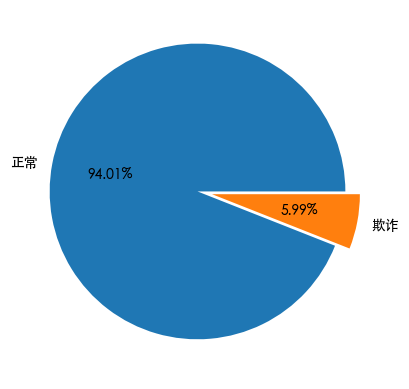

In [29]:
# visualize the distribution of target variable 可视化目标变量分布
# 计算对应客户数量
ontime = df[df[target] == 0].shape[0]
default = df[df[target] == 1].shape[0]

# 总客户数
total = [ontime, default]

# 标签
label = ['正常', '欺诈']

# 绘制饼图
plt.pie(total, labels = label, autopct = '%1.2f%%', explode = (0.1, 0));

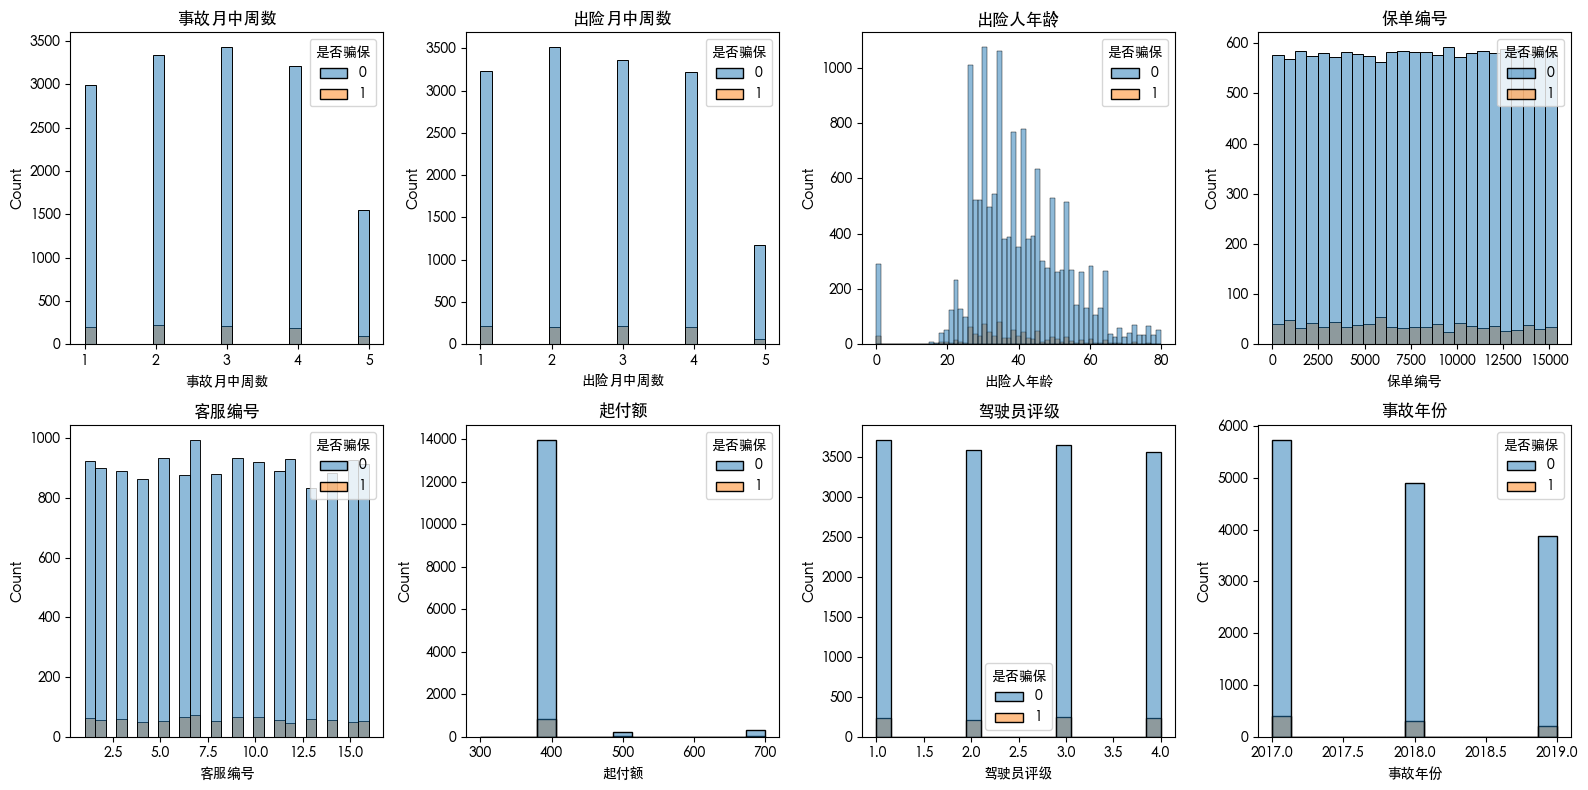

In [13]:
# visualize the distribution of continous variables 连续型变量分布可视化
ncol = 4 # 每行显示的图形数量
nrow = int(np.ceil(len(continous) / ncol)) # 行数

fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 4)) # 设置图形大小
for i, var in enumerate(continous):
    loc = (i // ncol, i % ncol) # 位置
    sns.histplot(data = df, x = var, hue = target, ax = axes[loc]) # 绘制直方图
    axes[loc].set_title(var) # 设置标题
    
fig.tight_layout() # 调整图形间距

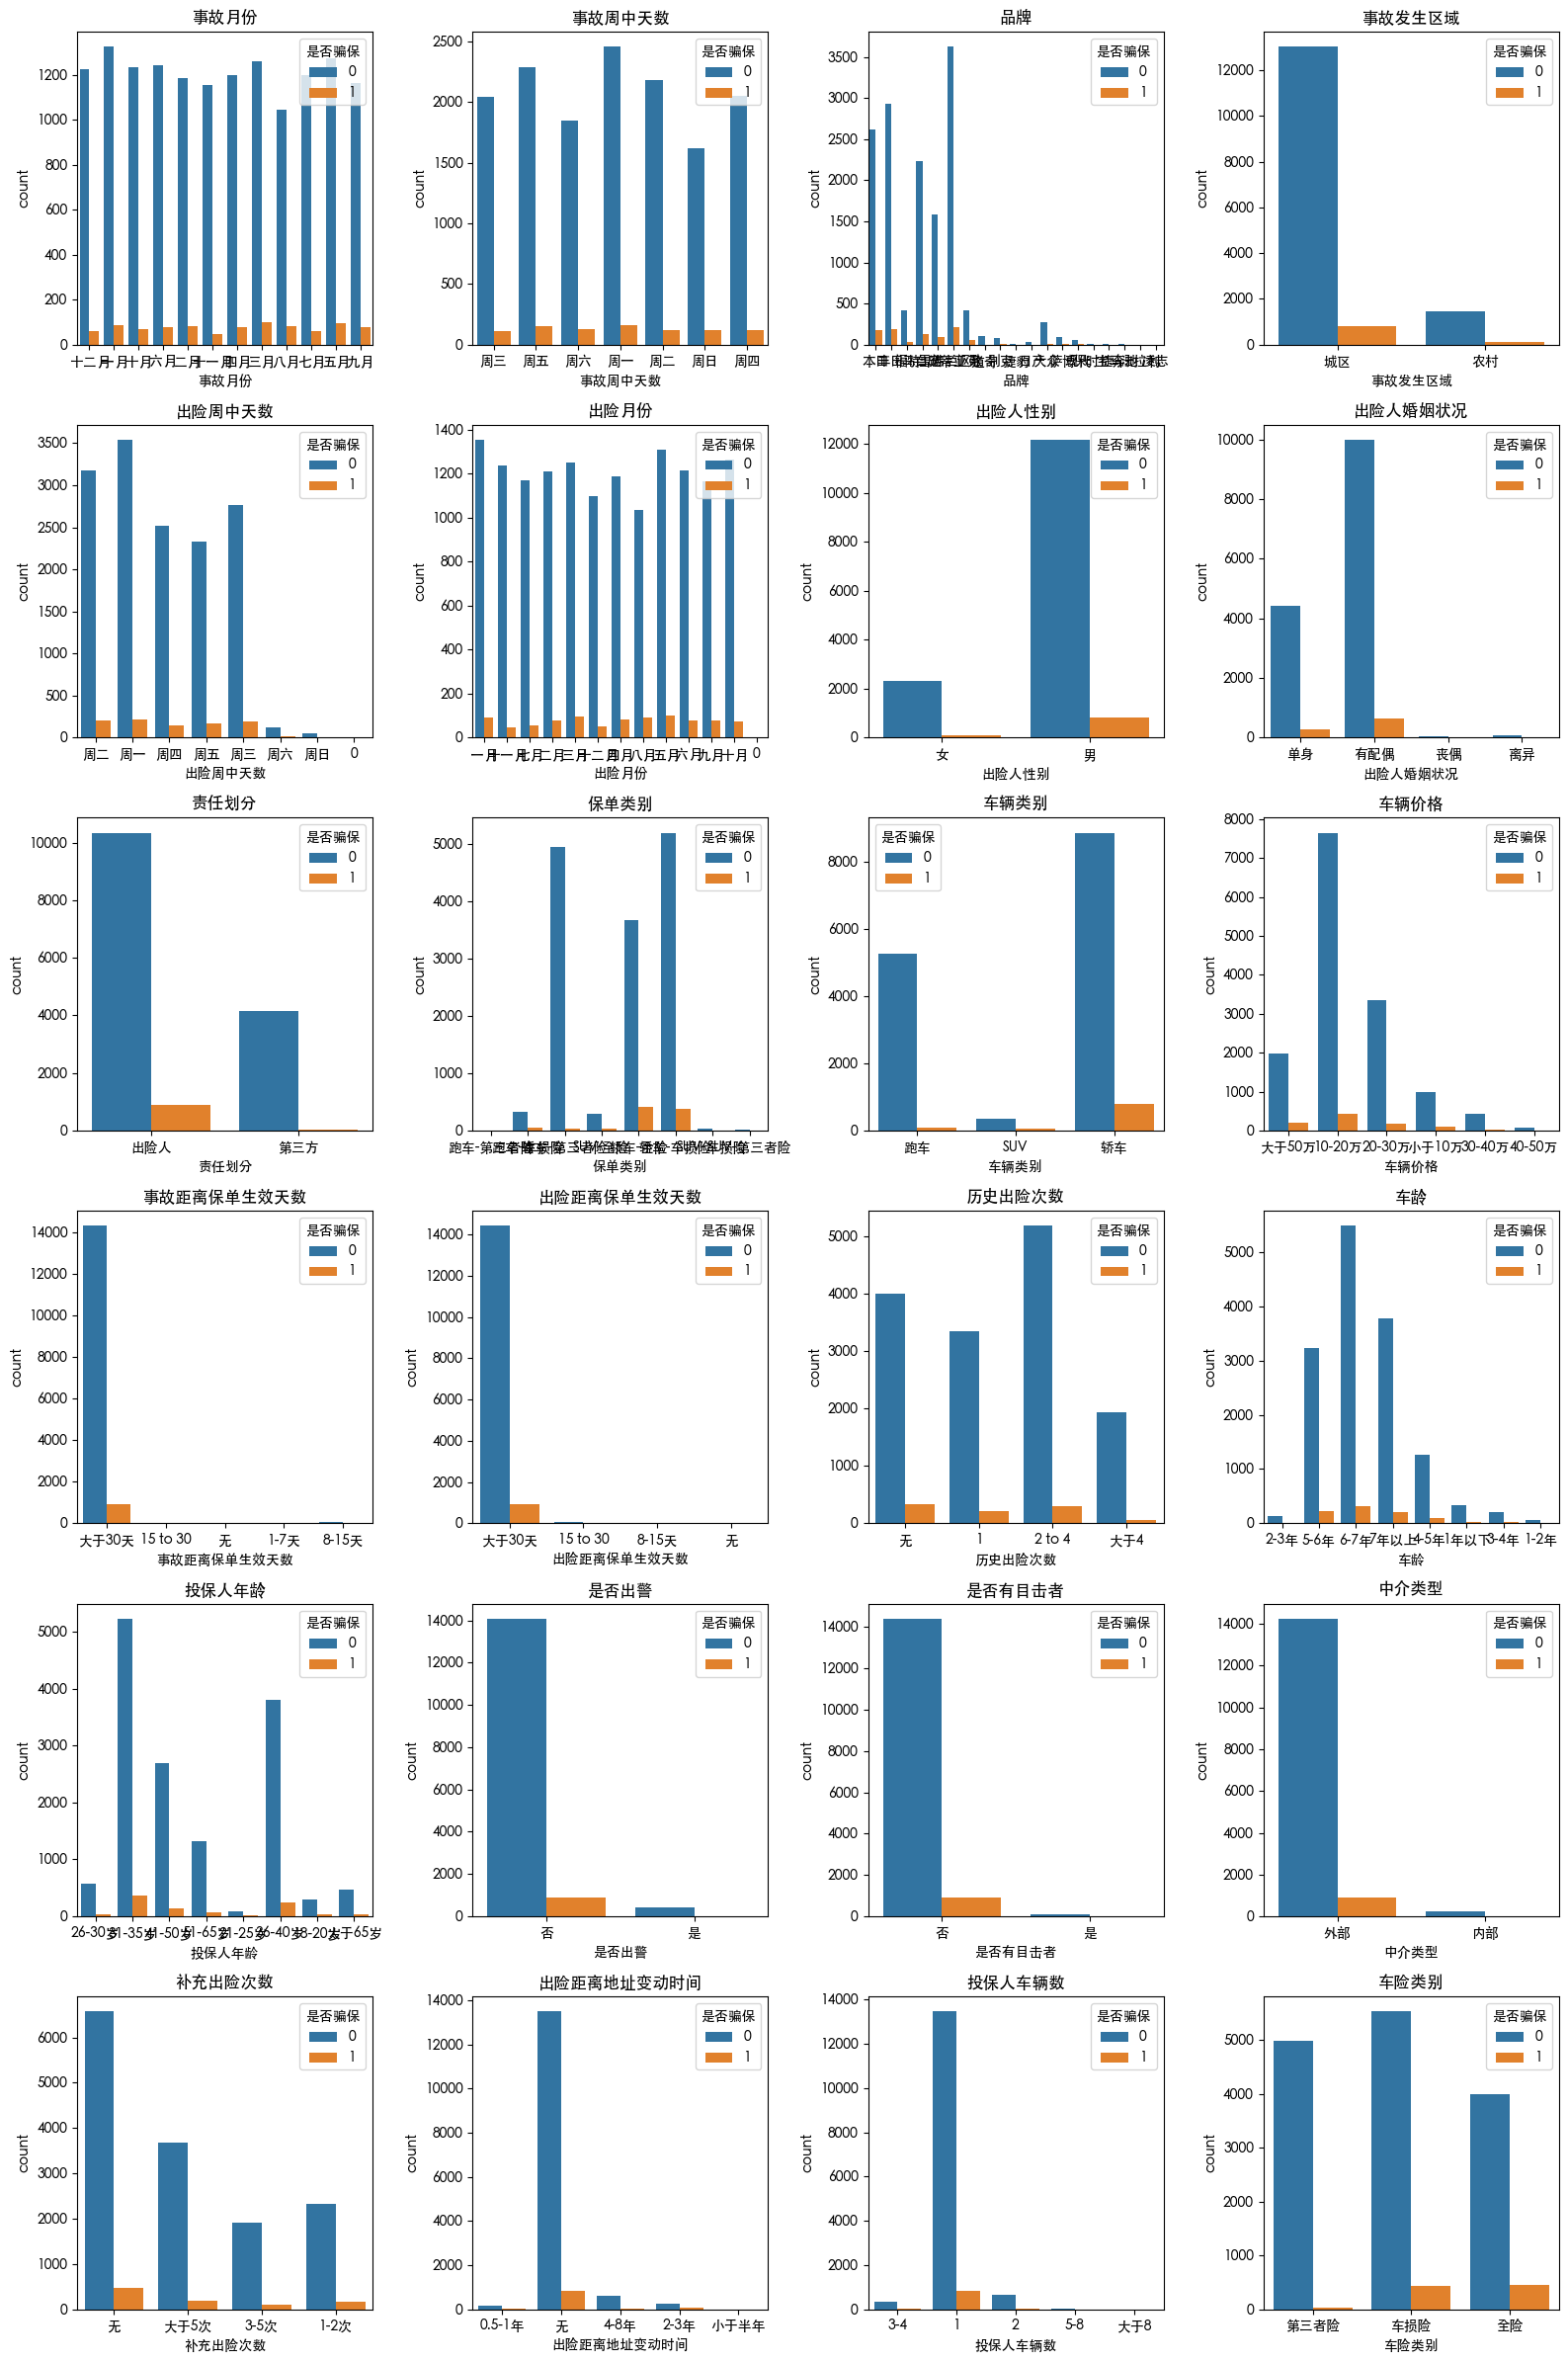

In [26]:
# visualize the distribution of categorical variables 离散型变量分布可视化
ncol = 4 # 每行显示的图形数量
nrow = int(np.ceil(len(categorical) / ncol)) # 行数

fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 4)) # 设置图形大小
for i, var in enumerate(categorical):
    loc = (i // ncol, i % ncol) # 位置
    sns.countplot(data = df, x = var, hue = target, ax = axes[loc]) # 绘制直方图
    axes[loc].set_title(var) # 设置标题
    
fig.tight_layout() # 调整图形间距